# Demo/ experimentation code
* Imports image
* Takes 2D FFT
* Analyses the frequency component



In [21]:
import skimage
from skimage import io
import matplotlib.pyplot as plt

from scipy.fft import fft, fft2,fftshift, fftfreq
import numpy as np

In [22]:
# PATH_TO_IMAGE =  '../OPT Shared files/2022-10-20 Finding focal plane/2022-10-20/20221020-grating/2022-10-20 grating positioning/MMStack_Pos0.ome.tif'
PATH_TO_IMAGE =  '../OPT Shared files/2022-10-21 grating contd/grating only/MMStack_Pos0.ome.tif'
#/Users/kenton/Library/CloudStorage/OneDrive-ImperialCollegeLondon/University/Physics/Year 4/project/OPT Shared files/2022-10-21 grating contd/grating only

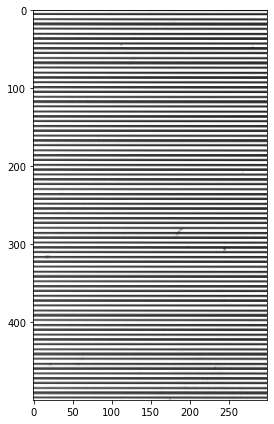

In [23]:
im = io.imread(PATH_TO_IMAGE)[300:800, 300:600]
plt.figure(figsize=(6,6))
io.imshow(im)

An example line profile

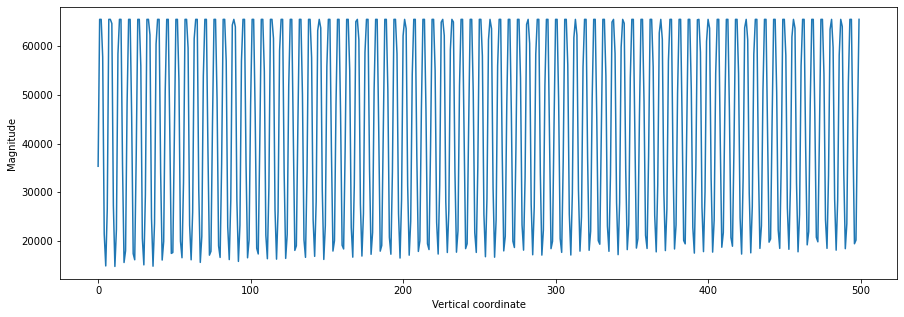

In [24]:
plt.figure(figsize=(15,5))
plt.ylabel('Magnitude')
plt.xlabel('Vertical coordinate')
plt.plot(im[:,0])

Text(0.5, 0, 'x Frequency (cycle per pixel)')

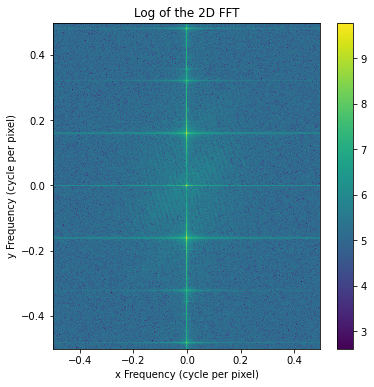

In [25]:
# Take FFT
ft = fftshift(fft2(im))
ft_log = np.log10(np.abs(ft))

length_per_pixel = 1

plt.figure(figsize=(6,6))
plt.title('Log of the 2D FFT')
x_size = ft.shape[0]
y_size = ft.shape[1]
x_freqs = fftshift(fftfreq(x_size, d = length_per_pixel)) 
y_freqs = fftshift(fftfreq(y_size, d = length_per_pixel) )
X,Y = np.meshgrid(x_freqs, y_freqs)

plt.pcolormesh(Y, X, ft_log.T, shading='auto')
plt.colorbar()
plt.ylabel('y Frequency (cycle per pixel)')
plt.xlabel('x Frequency (cycle per pixel)')

Text(0.5, 0, 'Frequencies (cycle per pixel)')

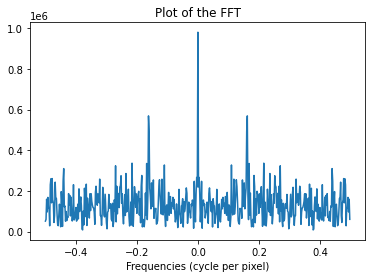

In [26]:
plt.title('Plot of the FFT')
plt.plot(x_freqs, (np.abs(ft)[:,0]), ls='-')
plt.xlabel('Frequencies (cycle per pixel)')

Text(0.5, 0, 'Frequencies (cycle per pixel)')

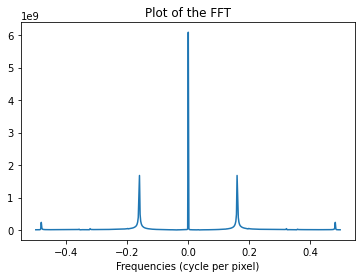

In [27]:
plt.title('Plot of the FFT')
plt.plot(x_freqs, (np.abs(ft)[:,y_size//2]), ls='-')
plt.xlabel('Frequencies (cycle per pixel)')

# Analysis
* Applied to a stack of images

(17, 500, 300)


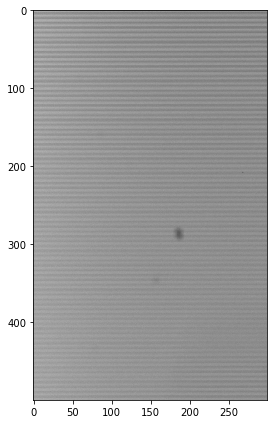

In [28]:
AIR_IMAGE_PATH =  '../data_store/20221023/f6_stack_air.tif'
im = io.imread(AIR_IMAGE_PATH)[:, 300:800, 300:600]
plt.figure(figsize=(6,6))
io.imshow(im[11])
print(im.shape)

In [29]:
x_size = im.shape[2]
y_size = im.shape[1]

In [30]:
ft_stack = fftshift(fft2(im), axes=[-1,-2])
ft_abs = np.abs(ft_stack)
ft_log = np.log10(ft_abs)

An example of the 2D FFT

Text(0.5, 0, 'x Frequency (cycle per pixel)')

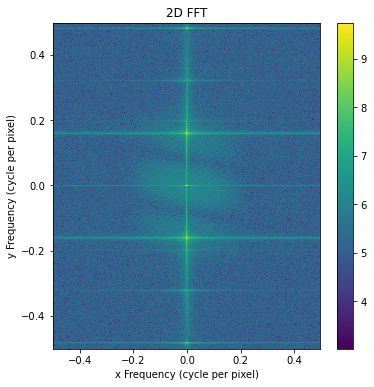

In [31]:
plt.figure(figsize=(6,6))
plt.title('2D FFT')

x_freqs = fftshift(fftfreq(x_size, d = length_per_pixel)) 
y_freqs = fftshift(fftfreq(y_size, d = length_per_pixel) )
X,Y = np.meshgrid(x_freqs, y_freqs)

plt.pcolormesh(X,Y,ft_log[7], shading='auto')
plt.colorbar()
plt.ylabel('y Frequency (cycle per pixel)')
plt.xlabel('x Frequency (cycle per pixel)')


Plot out several frequencies for inspection

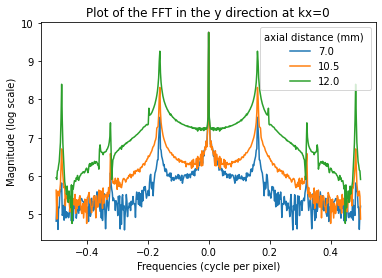

In [32]:
plt.title('Plot of the FFT in the y direction at kx=0')
air_range = np.array([7, 8, 9, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5, 16, 17])

def plot_line(idx):
    data = ft_log[idx,:, x_size//2]
    plt.plot(y_freqs, data, label=air_range[idx])

plot_line(0)
plot_line(4)
plot_line(7)

plt.xlabel('Frequencies (cycle per pixel)')
plt.ylabel('Magnitude (log scale)')
plt.legend(title='axial distance (mm) ')

Plot all the frequencies

Text(0, 0.5, 'Magnitude')

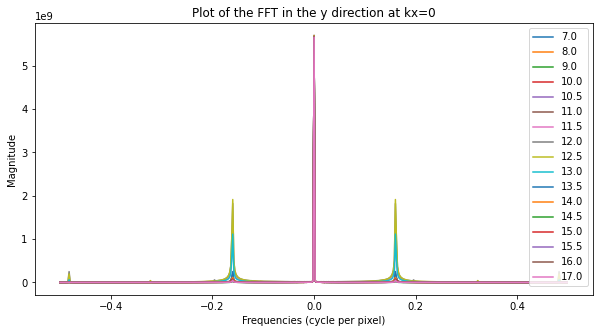

In [33]:
plt.figure(figsize=(10,5))
plt.title('Plot of the FFT in the y direction at kx=0')

plt.plot( y_freqs, (np.moveaxis(np.abs(ft_stack[:,:, x_size//2]), 0, -1)), label=air_range)
plt.legend()
plt.xlabel('Frequencies (cycle per pixel)')
plt.ylabel('Magnitude')

## Modelling

* Eyeball grating function
* Scaled everything to the correct range

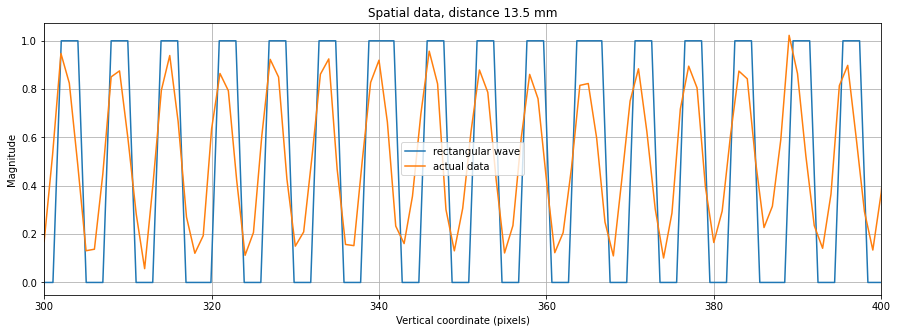

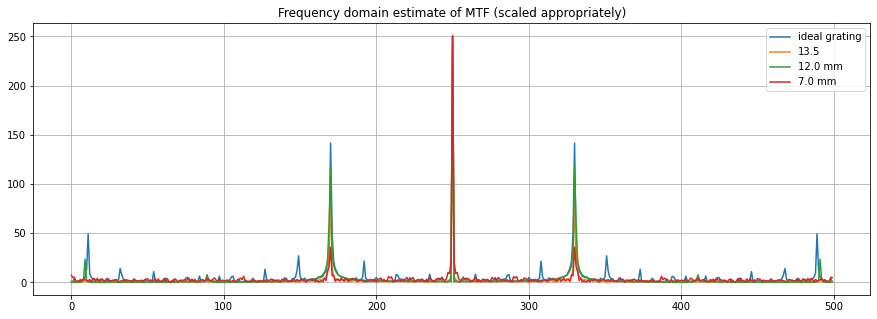

In [34]:
import scipy as sp

plt.figure(figsize=(15,5))

t = np.linspace(0, y_size, y_size)


period = 6.23 # in pixels
shift = 4 # pixels

wave = 0.5*sp.signal.square(t) + 0.5
slice = 10

# Scaling the data
def scale_data(data):
    data_mid = (np.max(data) + np.min(data))/2
    data_mid = np.average(data)
    data_range = (np.max(data) - np.min(data))
    data = (data-data_mid)/data_range + 0.5
    return data

data = scale_data(im[slice,:, 0].astype('float64'))
plt.plot(period* (t-shift) / (2*np.pi), wave, label='rectangular wave' )
plt.plot(data, label='actual data')

plt.xlim(300,400)

plt.title(f'Spatial data, distance {air_range[slice]} mm')
plt.ylabel('Magnitude')
plt.xlabel('Vertical coordinate (pixels)')

plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.title(f'Frequency domain estimate of MTF (scaled appropriately)')
plt.plot(np.abs(fftshift(fft(wave))), label='ideal grating')
plt.plot(np.abs(fftshift(fft(data))), label=f'{air_range[slice]}')
plt.plot(np.abs(fftshift(fft(scale_data(im[7,:, 0].astype('float64'))))), label=f'{air_range[7]} mm')
plt.plot(np.abs(fftshift(fft(scale_data(im[0,:, 0].astype('float64'))))), label=f'{air_range[0]} mm')
plt.grid()
plt.legend()
plt.show()

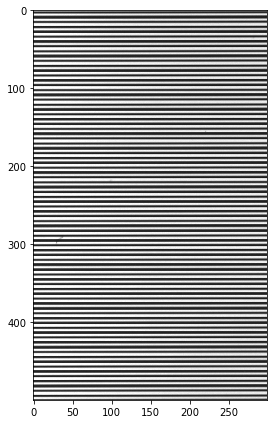

In [47]:
WATER_IMAGE_PATH =  '../data_store/20221023/f6_stack_water.tif'
im_water = io.imread(WATER_IMAGE_PATH)[:, 300:800, 300:600]
plt.figure(figsize=(6,6))
io.imshow(im_water[11])
water_range = np.array([9, 10, 11, 12, 13, 14, 15, 16, 16.5, 17, 17.5, 18, 18.5, 19, 20, 21])

## DOF by contrast

Text(0.5, 0, 'Axial coordinate (mm)')

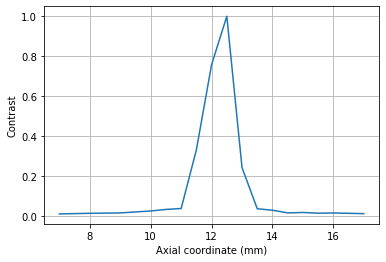

In [46]:
def get_contrast(image_stack):
    maxes = []
    mins = []
    for i in range(len(air_range)):
        line_profile = im[i,:, 0].astype('float64')
        maxes.append(np.max(line_profile))
        mins.append(np.min(line_profile))

    maxes = np.array(maxes)
    mins = np.array(mins)
    contrast = (maxes-mins)/mins
    return contrast

air_contrast = get_contrast(im)
water_contrast = get_contrast(im_water)

plt.plot(air_range, air_contrast/np.max(air_contrast))
plt.plot(water_range, water_contrast/np.max(water_contrast))
plt.ylabel('Contrast')
plt.grid()
plt.xlabel('Axial coordinate (mm)')